### Importando Pacotes

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('houses_to_rent_v2.csv')

In [9]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [7]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [10]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema: Explorar o valor do aluguel

### Estatística Univariada

In [14]:
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

In [18]:
#renomeando a coluna para facilitar ao longo do código
df.rename(columns = {'rent amount (R$)': "valor_aluguel"}, inplace=True)

In [19]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [20]:
df.valor_aluguel.mean()

3896.247194163861

In [25]:
df['valor_aluguel'].median()

2661.0

In [26]:
#pelo media ser muito maior que a mediana, há indicação de haver outliers que estão puxando a média para cima

In [27]:
df['valor_aluguel'].std()

3408.5455176710675

In [28]:
#desvio padrão muito alto, valores muitos dispersos

In [30]:
df.valor_aluguel.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

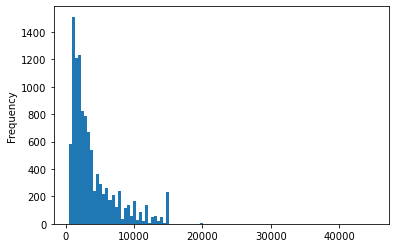

In [31]:
df['valor_aluguel'].plot(kind='hist',bins=100)

In [32]:
#valor maior que 0, dados não simetricos - positive skew - média>mediana>moda
df.valor_aluguel.skew()

1.8388773035440982

In [33]:
#valor maior que 0, um pico maior que a normal
df.valor_aluguel.kurtosis()

4.624228179818687

In [37]:
int(df.valor_aluguel.mode())

2500

## Exploração Multivariável

### Perguntas

- Qual a cidade com a média de aluguel mais alta? 

In [40]:
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending=False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


- Quantos banheiros existem, em média, nas residencias com alugueis mais altos?
    - alugueis acima de 5000 serão considerados como altos

In [41]:
df['aluguel_alto']=['Alto' if x>5000 else 'Baixo' for x in df['valor_aluguel']]

In [44]:
df.aluguel_alto.value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [45]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

 ### Hipoteses

- Quantos mais banheiros no imovel maior o valor do aluguel 

In [46]:
df[['valor_aluguel','bathroom']].corr() #default é pearson

,valor_aluguel,bathroom
valor_aluguel,1.000000,0.668504
bathroom,0.668504,1.000000


In [47]:
df[['valor_aluguel','bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [48]:
aux=pd.DataFrame({'colunas':df.columns, 'tipo':df.dtypes})

In [49]:
aux

,colunas,tipo
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


In [55]:
lista=list(aux[aux['tipo']=='int64']['colunas'])

In [56]:
lista

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'hoa (R$)',
 'valor_aluguel',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [57]:
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel',coluna]].corr(method='spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

### Visualização dos dados

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

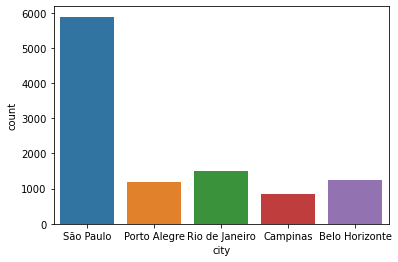

In [70]:
sns.countplot(x='city', data = df)

In [71]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

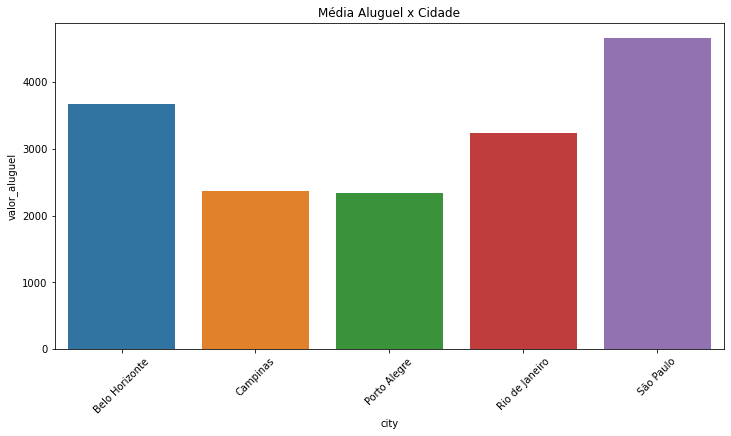

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(x='city', y='valor_aluguel',data=df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média Aluguel x Cidade')
plt.xticks(rotation = 45)
plt.show()

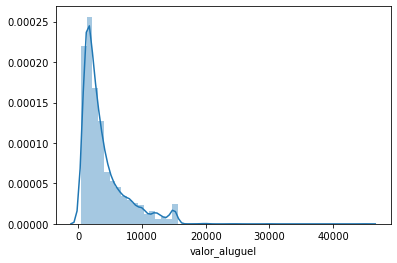

In [76]:
sns.distplot(df['valor_aluguel'])

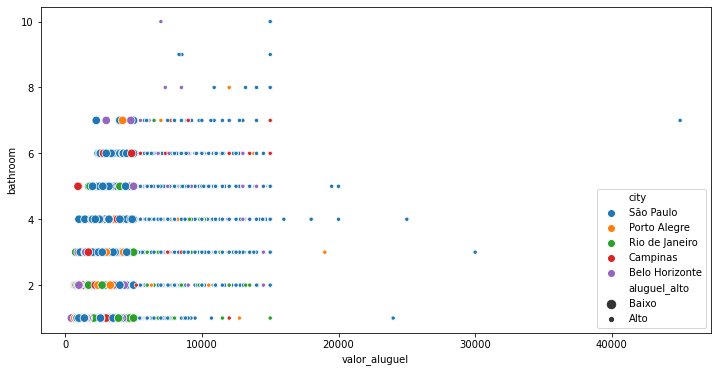

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='valor_aluguel', y='bathroom', hue='city', size='aluguel_alto',data=df)

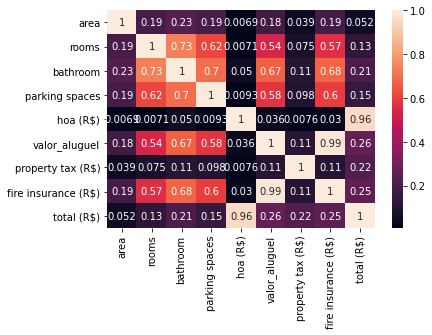

In [84]:
sns.heatmap(df.corr(), annot = True)

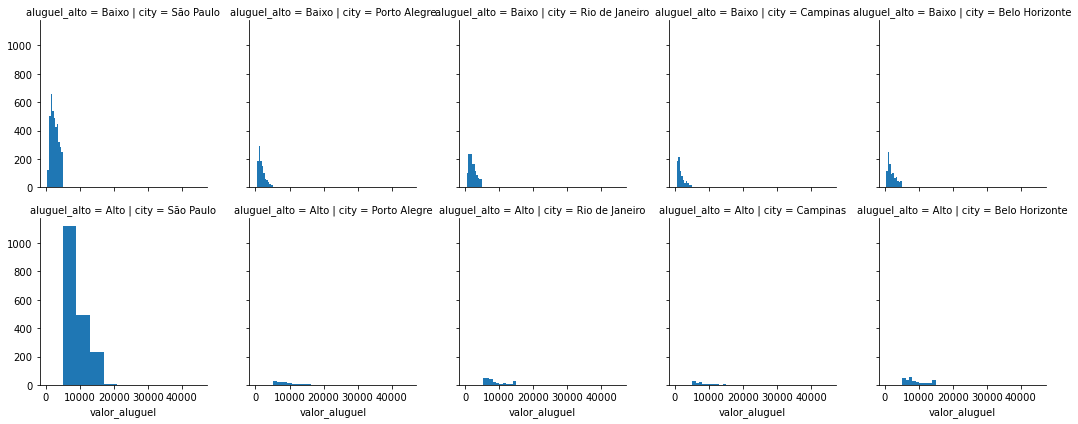

In [86]:
g=sns.FacetGrid(df, col='city', row='aluguel_alto')
g=g.map(plt.hist, 'valor_aluguel')